<a href="https://www.kaggle.com/code/sonujhajharia4/sonuu-2347015?scriptVersionId=181061057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/titanic-machine-learning-from-disaster/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df=df.drop('Ticket',axis=1)

In [7]:
df=df.drop('Name',axis=1)

In [8]:
df=df.drop('Cabin',axis=1)

In [9]:
df=df.drop('PassengerId',axis=1)

In [10]:
df.fillna({'Embarked':df['Embarked'].mode()},inplace=True)

In [11]:
df.fillna({'Age':df['Age'].median()},inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
df.fillna({'Embarked':df['Embarked'].mode()},inplace=True)

ONE HOT ENCODING


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
df_encoded = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [16]:
one_hot_encoded = df_encoded.fit_transform(df[['Embarked']])

In [17]:
df=pd.concat([df, one_hot_encoded],axis=1)

In [18]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0,0.0,1.0,0.0
887,1,1,female,19.0,0,0,30.0000,S,0.0,0.0,1.0,0.0
888,0,3,female,28.0,1,2,23.4500,S,0.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,1.0,0.0,0.0,0.0


In [19]:
one_hot_encoded_1 = df_encoded.fit_transform(df[['Sex']])

In [20]:
df=pd.concat([df, one_hot_encoded_1],axis=1)

In [21]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,0.0,0.0,1.0,0.0,1.0,0.0
888,0,3,female,28.0,1,2,23.4500,S,0.0,0.0,1.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
df=df.drop('Sex',axis=1)

In [23]:
df=df.drop('Embarked',axis=1)

In [24]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0
888,0,3,28.0,1,2,23.4500,0.0,0.0,1.0,0.0,1.0,0.0
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0


In [25]:
df.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
Sex_female      0
Sex_male        0
dtype: int64

In [26]:
X = df.drop(['Survived'], axis=1)

In [27]:
y=df['Survived']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [29]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(random_state=16)

lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  20],
       [ 31,  55]])

Text(0.5, 23.52222222222222, 'Predicted label')

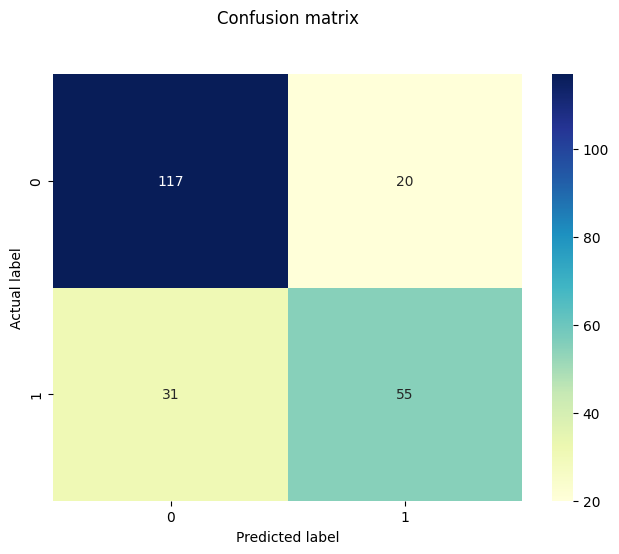

In [31]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


<Axes: xlabel='Survived', ylabel='count'>

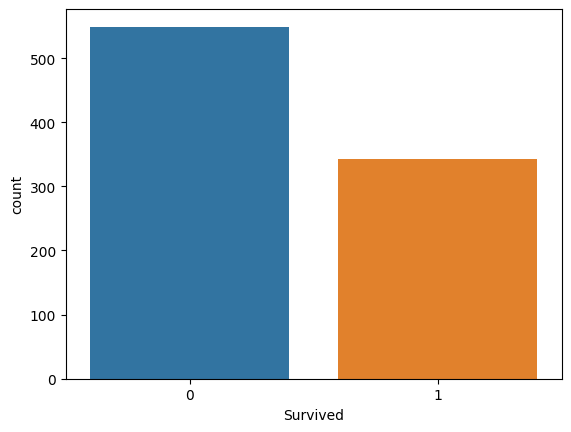

In [32]:
sns.countplot(data=df,x='Survived')


<Axes: xlabel='Sex_female', ylabel='Survived'>

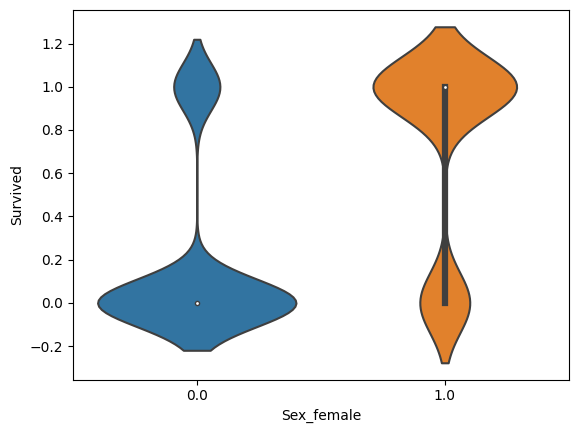

In [33]:
sns.violinplot(data=df,x='Sex_female',y='Survived')